Kaggle competition - https://www.kaggle.com/competitions/kkbox-churn-prediction-challenge/overview

In [13]:
import warnings
warnings.filterwarnings('ignore') 

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!du -h data/*.csv


409M	data/members_v3.csv
41M	data/sample_submission_v2.csv
44M	data/train_v2.csv
111M	data/transactions_v2.csv
1,4G	data/user_logs_v2.csv


In [3]:
members_df = pd.read_csv("data/members_v3.csv")
train_df = pd.read_csv("data/train_v2.csv")
transcactions_df = pd.read_csv("data/transactions_v2.csv")
sample_submission = pd.read_csv("data/sample_submission_v2.csv")

### Members

In [5]:
sample_members_df = members_df.sample(frac=0.1)

In [6]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [7]:
members_df.head(4)

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915


In [8]:
members_df["gender"].value_counts()

gender
male      1195355
female    1144613
Name: count, dtype: int64

In [9]:
members_df["gender"].isna().mean()

0.6543352783887313

Text(0, 0.5, 'Count (Millions)')

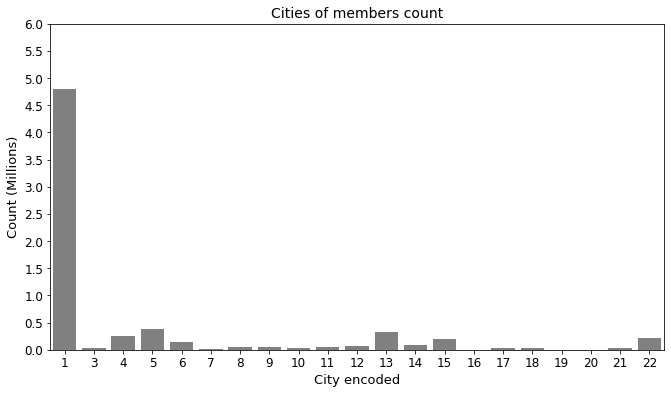

In [31]:

city_counts = members_df["city"].value_counts().reset_index()
city_counts["count"] /= 1000_000
city_counts.columns = ["city", "count"]

plt.figure(figsize=(11, 6))
sns.barplot(data=city_counts, x="city", y="count", color="grey")
plt.yticks(np.linspace(0, 6, 13), fontsize=12)
plt.xticks(fontsize=12)
plt.title("Cities of members count", fontsize=14)
plt.xlabel("City encoded", fontsize=13)
plt.ylabel("Count (Millions)", fontsize=13)


**Initial Obsevations**:
1) Timestamps are written as integer. We might want to convert it to datetime format
2) We have many unspecified genders, 65% of genders are NaNs
    